In [1]:
%matplotlib inline                                                             
import matplotlib as mpl                                                          #packages imported
import matplotlib.pyplot as plt
import random
import math

In [2]:
def spheref(x,y):                                                                 #sphere function for distance
    d = float(x**2+y**2)
    return d

In [3]:
def light(d):                                                                     #light intensity function
    l=1/d
    return l

In [4]:
def roulette_wheel(total):                                                        #roulette wheel function
    global c
    leader=-1
    r = random.uniform(0,1)
    for n in range(c):
        if r<total[n]:
            leader=n
            break
    return leader 

In [5]:
def probability_func(values,prob):                                                #calculating probability (max)
    global c
    for j in range(c):
        prob.append(values[j]/sum(values))
    return prob    

In [6]:
def slope(x1, y1, x2, y2):                                                        #slope function
    m = (float)(y2-y1)/(x2-x1)
    t = math.atan(m)
    return(t)

In [7]:
def new_inputf(new_input,matrix,c_follow,t):                                         #new matrix acc to following                                                              
    global c,step
    for i in range(c):
        xn=matrix[i][0]
        yn=matrix[i][1]
        xf=matrix[c_follow[i]][0]
        yf=matrix[c_follow[i]][1]
        
        if (c_follow[i]==i):
            t=random.uniform(-math.pi,math.pi)
            cos=abs(math.cos(t))*step
            sin=abs(math.sin(t))*step
            new_input[i].append(xn-cos)
            new_input[i].append(yn-sin)
        else:
            t=slope(xn,yn,xf,yf)
            cos=abs(math.cos(t))*step
            sin=abs(math.sin(t))*step
            #print("Theta= ",t)
            
            if (xn<xf and yn<yf):
                new_input[i].append(xn+cos)
                new_input[i].append(yn+sin)
            elif (xn>xf and yn>yf):
                new_input[i].append(xn-cos)
                new_input[i].append(yn-sin)
            elif (xn>xf and yn<yf):
                new_input[i].append(xn-cos)
                new_input[i].append(yn+sin)
            elif (xn<xf and yn>yf):
                new_input[i].append(xn+cos)
                new_input[i].append(yn-sin)

    return new_input

In [13]:
def main_func(matrix,n,x,y):   
    global frange,l,b,c              
   
    for i in range(c):                                                            #storing for plot
        x[i].append(matrix[i][0])
        y[i].append(matrix[i][1])
        
    distance_sq=[]                                                               #distance and light intensity
    distance=[]
    for i in range(c):
        distance_sq.append(float(spheref(matrix[i][0],matrix[i][1])))
        distance.append(float(math.sqrt(distance_sq[i])))
    #print("Distance from light source: ", distance)
    
    light_int=[]
    for j in range(c):
        light_int.append(float(light(distance_sq[j])))
    print("Light intensity: ",light_int)
    
    prob=[]
    probability_func(light_int,prob)
    #print("Probabilities: ",prob)
    
    total=[]                                                                      #creating the roulette scale
    for i in range(c):
        total.append(sum(prob[0:i+1]))
    #print("Roulette Wheel: ",total)
    
    c_follow=[]                                                                   #determining who follows whom
    for i in range(c):
        c_follow.append(int(roulette_wheel(total)))
    #print("Following: ",c_follow)
    
    m=t=0
    new_input=[[] for _ in range(c)]                                              #new coordinates
    new_inputf(new_input,matrix,c_follow,t)
    print("Next Learning attempt: ",new_input)
    
    print("Learning attempt no= ",n)
    n=n+1
    #if n>200:

    if all(val>4 for val in light_int):
        return(x,y)
    else:
        main_func(new_input,n,x,y)    

In [14]:
c=int(input("Enter number of candidates:"))                                      #taking input 
l=float(input("Enter length of arena:"))
b=float(input("Enter breadth of arena:"))
step=float(((l*b)**(0.5))/100)
print("Step=",step)

matrix=[[] for _ in range(c)]                                                    #matrix to store values of x,y
for i in range(c):
    matrix[i].append(random.uniform(0,l))
    matrix[i].append(random.uniform(0,b))
    
print("Start positions: ",matrix)

Enter number of candidates:3
Enter length of arena:5
Enter breadth of arena:5
Step= 0.05
Start positions:  [[1.6186927502216097, 3.2273176325675266], [2.8741768068438267, 0.2998369500779935], [3.3904612020205764, 4.509124265763183]]


In [15]:
x=[[] for _ in range(c)]
y=[[] for _ in range(c)]
main_func(matrix,1,x,y)

Light intensity:  [0.07671214613109055, 0.11974908475686886, 0.03141944032235921]
Next Learning attempt:  [[1.6095203486724572, 3.1781661620928694], [2.854469577412996, 0.3457893723009907], [3.340620830218099, 4.5051321061232334]]
Learning attempt no=  1
Light intensity:  [0.07879415997817907, 0.12095457068935472, 0.03179047500679641]
Next Learning attempt:  [[1.6296397230904986, 3.1323926897204717], [2.8343502029949548, 0.3915628446733885], [3.3009381757655794, 4.474713576645267]]
Learning attempt no=  2
Light intensity:  [0.08020783718051654, 0.1221469147405714, 0.03234230638255428]
Next Learning attempt:  [[1.64975909750854, 3.086619217348074], [2.808329370056124, 0.34886722132427384], [3.2523752831995036, 4.462812086586631]]
Learning attempt no=  3
Light intensity:  [0.08163982888419041, 0.12486854169529658, 0.03279265169613371]
Next Learning attempt:  [[1.6153969943381892, 3.0502977930132524], [2.7888432252498467, 0.3949138298919934], [3.2229382184842024, 4.422396010318057]]
Learn

Light intensity:  [1.3945178925194668, 1.2548766462146899, 1.305074364586541]
Next Learning attempt:  [[0.7121841562200282, 0.36664677550216906], [0.7834415376671575, 0.35691301776925205], [0.7448429667503318, 0.3570233943493609]]
Learning attempt no=  200
Light intensity:  [1.5585157267307477, 1.3492225968101657, 1.465723865873589]
Next Learning attempt:  [[0.6624552805620287, 0.36144687879249915], [0.7334424830727333, 0.3566055447398961], [0.7948427623183862, 0.35688041479571797]]
Learning attempt no=  201
Light intensity:  [1.7559544791576487, 1.503521117496107, 1.3172824273800414]
Next Learning attempt:  [[0.7123394033079044, 0.3580447768136612], [0.719552398744514, 0.3085736224656943], [0.7448724802731624, 0.3586040482604625]]
Learning attempt no=  202
Light intensity:  [1.5732584137268988, 1.6313923344910557, 1.4632036288405545]
Next Learning attempt:  [[0.7195532321115188, 0.3085679067227577], [0.7123385699408996, 0.3580504925565978], [0.7128184230806226, 0.32023039300718503]]
L

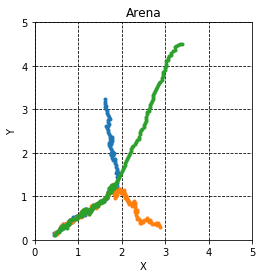

In [16]:
fig,ax=plt.subplots()
for p in range(c):
    ax.plot(x[p],y[p],".",linewidth=2,)
    
ax.set_title("Arena")
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_xlim((0,l))
ax.set_ylim((0,b))
x0,x1 = ax.get_xlim()
y0,y1 = ax.get_ylim()
ax.set_aspect(abs(x1-x0)/abs(y1-y0))
ax.grid(b=True, which='major', color='k', linestyle='--')
plt.show()

Text(0,0.5,'Y')

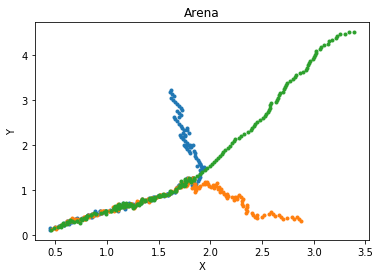

In [17]:
fig,ax=plt.subplots()
for p in range(c):
    ax.plot(x[p],y[p],".",linewidth=2,)
    
ax.set_title("Arena")
ax.set_xlabel("X")
ax.set_ylabel("Y")